In [47]:

# Fix randomness and hide warnings
seed = 42

import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["PYTHONHASHSEED"] = str(seed)
os.environ["MPLCONFIGDIR"] = os.getcwd() + "/configs/"

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)

import numpy as np

np.random.seed(seed)

import logging

import random

random.seed(seed)

In [48]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.13.0


In [49]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

plt.rc("font", size=16)

# Process data

In [50]:
categories = np.load("/kaggle/input/time-series-dataset/training_dataset/categories.npy")
data = np.load("/kaggle/input/time-series-dataset/training_dataset/training_data.npy")
valid_periods = np.load("/kaggle/input/time-series-dataset/training_dataset/valid_periods.npy")

In [51]:
count_A=0
count_B=0
count_C=0
count_D=0
count_E=0
count_F=0

for i in range(data.shape[0]):
  if categories[i]=='A':
    count_A+=1
  if categories[i]=='B':
    count_B+=1
  if categories[i]=='C':
    count_C+=1
  if categories[i]=='D':
    count_D+=1
  if categories[i]=='E':
    count_E+=1
  if categories[i]=='F':
    count_F+=1

print(f"There are {count_A} occurences of category A")
print(f"There are {count_B} occurences of category B")
print(f"There are {count_C} occurences of category C")
print(f"There are {count_D} occurences of category D")
print(f"There are {count_E} occurences of category E")
print(f"There are {count_F} occurences of category F")

There are 5728 occurences of category A
There are 10987 occurences of category B
There are 10017 occurences of category C
There are 10016 occurences of category D
There are 10975 occurences of category E
There are 277 occurences of category F


There are 5728 elements in the dataset of category A
There are 10987 elements in the dataset of category B
There are 10017 elements in the dataset of category C
There are 10016 elements in the dataset of category D
There are 10975 elements in the dataset of category E
There are 277 elements in the dataset of category F


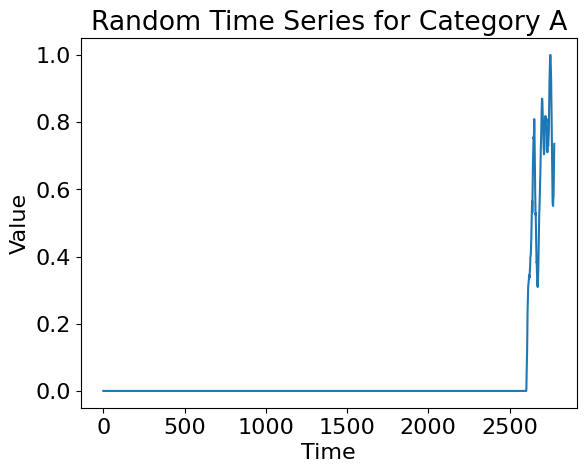

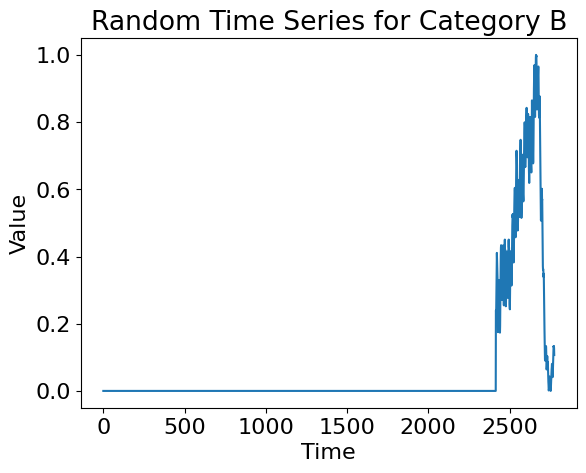

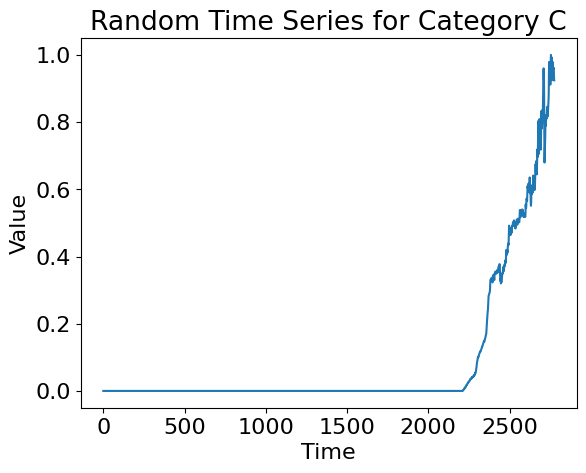

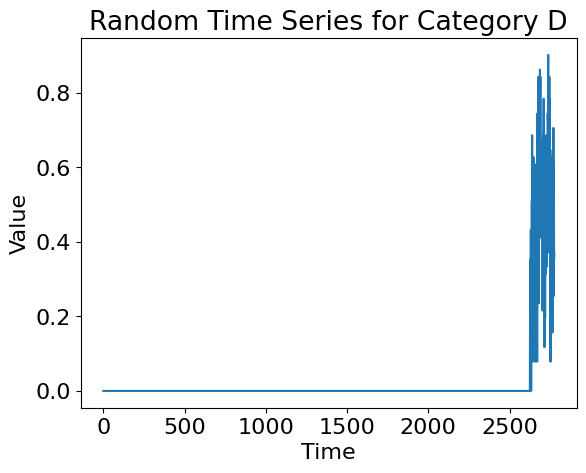

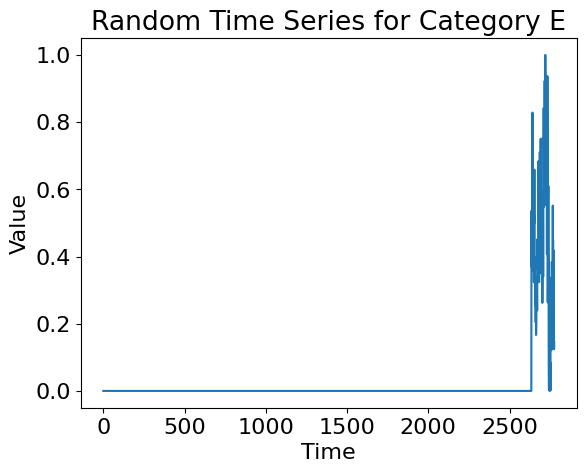

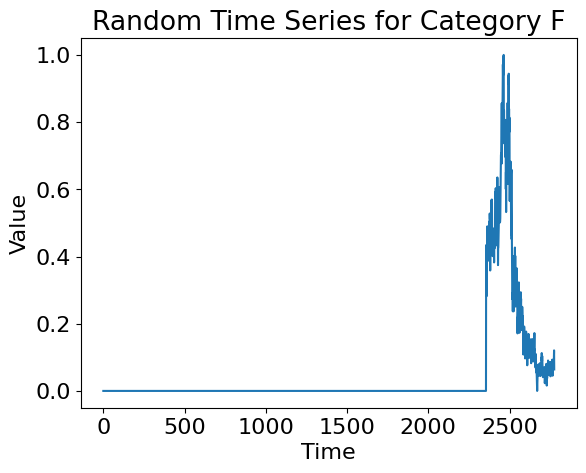

In [52]:
from random import randint

# Get the unique categories
unique_categories = np.unique(categories)
data_A=[]
data_B=[]
data_C=[]
data_D=[]
data_E=[]
data_F=[]

for cat in unique_categories:
  for i in range(categories.shape[0]):
    if categories[i]==cat:
      if cat=='A':
        data_A.append(data[i,:])
      elif cat=='B':
        data_B.append(data[i,:])
      elif cat=='C':
        data_C.append(data[i,:])
      elif cat=='D':
        data_D.append(data[i,:])
      elif cat=='E':
        data_E.append(data[i,:])
      elif cat=='F':
        data_F.append(data[i,:])

print(f"There are {len(data_A)} elements in the dataset of category A")
print(f"There are {len(data_B)} elements in the dataset of category B")
print(f"There are {len(data_C)} elements in the dataset of category C")
print(f"There are {len(data_D)} elements in the dataset of category D")
print(f"There are {len(data_E)} elements in the dataset of category E")
print(f"There are {len(data_F)} elements in the dataset of category F")

plt.plot(data_A[randint(0,len(data_A))])
plt.title('Random Time Series for Category A')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

plt.plot(data_B[randint(0,len(data_B))])
plt.title('Random Time Series for Category B')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

plt.plot(data_C[randint(0,len(data_C))])
plt.title('Random Time Series for Category C')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

plt.plot(data_D[randint(0,len(data_D))])
plt.title('Random Time Series for Category D')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

plt.plot(data_E[randint(0,len(data_E))])
plt.title('Random Time Series for Category E')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

plt.plot(data_F[randint(0,len(data_F))])
plt.title('Random Time Series for Category F')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [53]:
# Find the maximum number of samples
max_samples = max(len(arr) for arr in data_A)

# Print the result
print("Maximum number of samples:", max_samples)

# Find the minimum number of samples
min_samples = min(len(arr) for arr in data_A)

# Print the result
print("Minimun number of samples:", min_samples)

print(len(data_A))
print(data_A[0].shape)

Maximum number of samples: 2776
Minimun number of samples: 2776
5728
(2776,)


In [54]:
""""# Importing the required libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np

# Defining some hyperparameters
seq_len = 2776 # Length of each time series
n_seq = 1 # Number of features in each time series
noise_dim = 32 # Dimension of the noise vector
batch_size = 512 # Batch size for training
epochs = 400 # Number of epochs for training
lr = 0.0005 # Learning rate for the optimizer
beta_1 = 0.5 # Beta 1 parameter for the optimizer
beta_2 = 0.999 # Beta 2 parameter for the optimizer

# Defining the generator model
def build_generator():
  # The generator takes a noise vector as input and outputs a synthetic time series
  noise = layers.Input(shape=(noise_dim,))
  x = layers.Dense(seq_len * n_seq)(noise)
  x = layers.Reshape((seq_len, n_seq))(x)
  x = layers.Conv1D(64, 5, padding='same')(x)
  x = layers.LeakyReLU(0.2)(x)
  x = layers.Conv1D(128, 5, padding='same')(x)
  x = layers.LeakyReLU(0.2)(x)
  x = layers.Conv1D(n_seq, 5, padding='same', activation='tanh')(x)
  fake = layers.Reshape((seq_len, n_seq))(x)
  # The generator is a functional model with noise as input and fake as output
  return models.Model(noise, fake, name='generator')

def build_discriminator():
    # The discriminator takes a real or fake time series as input and outputs a probability of being real
    series = layers.Input(shape=(seq_len, n_seq))
    x = layers.Conv1D(32, 5, padding='same')(series)  # Decreased the number of filters
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(1, activation='sigmoid')(x)
    valid = layers.Reshape((1,))(x)
    # The discriminator is a functional model with series as input and valid as output
    return models.Model(series, valid, name='discriminator')

# Building and compiling the generator and the discriminator
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr, beta_1, beta_2), metrics=['accuracy'])

# Building and compiling the GAN model
# The GAN model consists of the generator and the discriminator
# The discriminator is frozen during the training of the GAN
discriminator.trainable = False
noise = layers.Input(shape=(noise_dim,))
fake = generator(noise)
valid = discriminator(fake)
gan = models.Model(noise, valid, name='gan')
gan.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr, beta_1, beta_2))

# Defining a function to generate and save some synthetic time series
def generate_and_save_series(epoch, generator, noise_dim, n_samples=16):
  # Generating some noise vectors
  noise = np.random.normal(0, 1, (n_samples, noise_dim))
  # Generating some synthetic time series from the noise vectors
  series = generator.predict(noise)
  # Saving the synthetic time series as a numpy array
  #np.save('synthetic_series_epoch_%d.npy' % epoch, series)

# Loading the real time series data
# Assuming that data_A is a numpy array of shape (5728, 2776, 1)
data_A = np.array(data_A)
data_A = np.expand_dims(data_A, axis=-1)
real_series = data_A
print(data_A.shape)

# Training the GAN model
for epoch in range(epochs):
  # Shuffling and batching the real time series data
  idx = np.random.permutation(real_series.shape[0])
  real_series = real_series[idx]
  n_batches = int(np.ceil(real_series.shape[0] / batch_size))
  # Looping over the batches
  for batch in range(n_batches):
    # Selecting a batch of real time series
    real_batch = real_series[batch * batch_size : (batch + 1) * batch_size]
    # Generating a batch of noise vectors
    noise = np.random.normal(0, 1, (real_batch.shape[0], noise_dim))
    # Generating a batch of synthetic time series from the noise vectors
    fake_batch = generator.predict(noise)
    # Concatenating the real and fake time series
    series_batch = np.concatenate((real_batch, fake_batch))
    # Creating a batch of labels for the discriminator
    # 1 for real time series, 0 for fake time series
    valid = np.ones((real_batch.shape[0], 1))
    fake = np.zeros((real_batch.shape[0], 1))
    labels_batch = np.concatenate((valid, fake))
    # Training the discriminator on the batch of real and fake time series
    d_loss, d_acc = discriminator.train_on_batch(series_batch, labels_batch)
    # Generating another batch of noise vectors
    noise = np.random.normal(0, 1, (batch_size, noise_dim))
    # Creating a batch of labels for the generator
    # 1 for fake time series, since we want to fool the discriminator
    valid = np.ones((batch_size, 1))
    # Training the generator on the batch of noise vectors
    g_loss = gan.train_on_batch(noise, valid)
    # Printing the losses and the accuracy
    print('Epoch %d, Batch %d/%d, D_loss: %.4f, D_acc: %.2f%%, G_loss: %.4f' % (epoch + 1, batch + 1, n_batches, d_loss, 100 * d_acc, g_loss))
    
    plt.figure(figsize=(4, 2))
    plt.plot(fake_batch[0, :, 0], label='Generated Sample (Batch {})'.format(batch + 1), color='blue')
    plt.title('Generated Sample (Batch {})'.format(batch + 1))
    plt.legend()
    plt.show()
  # Generating and saving some synthetic time series at the end of each epoch
  generate_and_save_series(epoch + 1, generator, noise_dim)
"""""

'"# Importing the required libraries\nimport tensorflow as tf\nfrom tensorflow.keras import layers, models, optimizers\nimport numpy as np\n\n# Defining some hyperparameters\nseq_len = 2776 # Length of each time series\nn_seq = 1 # Number of features in each time series\nnoise_dim = 32 # Dimension of the noise vector\nbatch_size = 512 # Batch size for training\nepochs = 400 # Number of epochs for training\nlr = 0.0005 # Learning rate for the optimizer\nbeta_1 = 0.5 # Beta 1 parameter for the optimizer\nbeta_2 = 0.999 # Beta 2 parameter for the optimizer\n\n# Defining the generator model\ndef build_generator():\n  # The generator takes a noise vector as input and outputs a synthetic time series\n  noise = layers.Input(shape=(noise_dim,))\n  x = layers.Dense(seq_len * n_seq)(noise)\n  x = layers.Reshape((seq_len, n_seq))(x)\n  x = layers.Conv1D(64, 5, padding=\'same\')(x)\n  x = layers.LeakyReLU(0.2)(x)\n  x = layers.Conv1D(128, 5, padding=\'same\')(x)\n  x = layers.LeakyReLU(0.2)(x)\n  

(5728, 2776, 1)
3/3 [==============================] - 0s 5ms/step
Epoch 1, D_loss: 0.5762, D_acc: 90.10%, G_loss: 0.8314
2/2 [==============================] - 0s 5ms/step


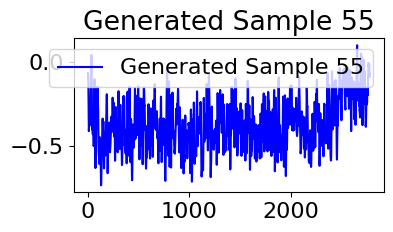

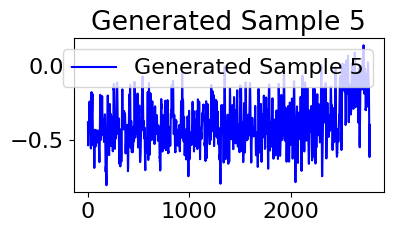

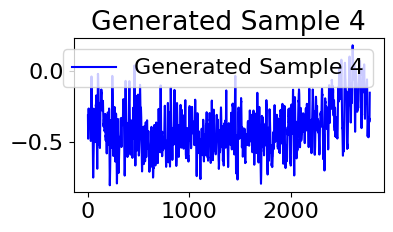

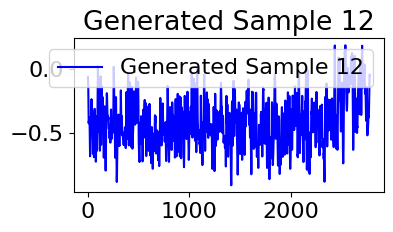

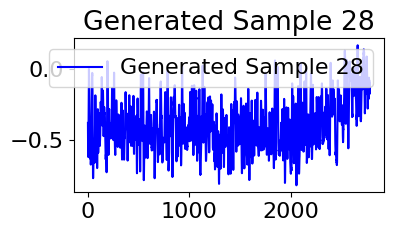

16/16 [==============================] - 0s 5ms/step


KeyboardInterrupt: 

In [55]:
# Importing the required libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import random

# Assuming you have real time series data loaded into 'data_A'
# Update the path or provide the actual data_A
data_A = np.array(data_A)
data_A = np.expand_dims(data_A, axis=-1)
print(data_A.shape)

# Defining some hyperparameters
seq_len = 2776  # Length of each time series
n_seq = 1  # Number of features in each time series
noise_dim = 32  # Dimension of the noise vector
batch_size = 512  # Batch size for training
epochs = 400  # Number of epochs for training
lr = 0.0005  # Learning rate for the optimizer
beta_1 = 0.5  # Beta 1 parameter for the optimizer
beta_2 = 0.999  # Beta 2 parameter for the optimizer

# Defining the generator model
def build_generator():
  # The generator takes a noise vector as input and outputs a synthetic time series
  noise = layers.Input(shape=(noise_dim,))
  x = layers.Dense(seq_len * n_seq)(noise)
  x = layers.Reshape((seq_len, n_seq))(x)
  x = layers.Conv1D(64, 5, padding='same')(x)
  x = layers.LeakyReLU(0.2)(x)
  x = layers.Conv1D(128, 5, padding='same')(x)
  x = layers.LeakyReLU(0.2)(x)
  x = layers.Conv1D(n_seq, 5, padding='same', activation='tanh')(x)
  fake = layers.Reshape((seq_len, n_seq))(x)
  # The generator is a functional model with noise as input and fake as output
  return models.Model(noise, fake, name='generator')

# Updated Discriminator Model
def build_discriminator():
    series = layers.Input(shape=(seq_len, n_seq))
    x = layers.LSTM(64, return_sequences=True)(series)
    x = layers.LSTM(32, return_sequences=True)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(1, activation='sigmoid')(x)
    valid = layers.Reshape((1,))(x)
    return models.Model(series, valid, name='discriminator')

# Building and compiling the generator and the discriminator
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr, beta_1, beta_2,clipvalue=0.5), metrics=['accuracy'])

# Building and compiling the GAN model
discriminator.trainable = False
noise = layers.Input(shape=(noise_dim,))
fake = generator(noise)
valid = discriminator(fake)
gan = models.Model(noise, valid, name='gan')
gan.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr, beta_1, beta_2,clipvalue=0.5))

# Defining a function to generate and save some synthetic time series
def generate_and_save_series(epoch, generator, noise_dim, n_samples=64):
    noise = np.random.normal(0, 1, (n_samples, noise_dim))
    series = generator.predict(noise)
    # Plot generated samples
    # Select 5 random samples for plotting
    plot_indices = random.sample(range(n_samples), k=5)

    # Plot selected samples
    for i in plot_indices:
        plt.figure(figsize=(4, 2))
        plt.plot(series[i, :, 0], label='Generated Sample {}'.format(i + 1), color='blue')
        plt.title('Generated Sample {}'.format(i + 1))
        plt.legend()
        plt.show()

# Training the GAN model
for epoch in range(epochs):
    idx = np.random.permutation(data_A.shape[0])
    real_series = data_A[idx]
    n_batches = int(np.ceil(real_series.shape[0] / batch_size))

    for batch in range(n_batches):
        real_batch = real_series[batch * batch_size: (batch + 1) * batch_size]

        # Train the generator 5 times
        for _ in range(5):
            noise = np.random.normal(0, 1, (batch_size, noise_dim))
            valid = np.ones((batch_size, 1))
            g_loss = gan.train_on_batch(noise, valid)

        # Train the discriminator once
        noise = np.random.normal(0, 1, (real_batch.shape[0], noise_dim))
        fake_batch = generator.predict(noise)
        series_batch = np.concatenate((real_batch, fake_batch))
        valid = np.ones((real_batch.shape[0], 1))
        fake = np.zeros((real_batch.shape[0], 1))
        labels_batch = np.concatenate((valid, fake))
        d_loss, d_acc = discriminator.train_on_batch(series_batch, labels_batch)

    print('Epoch %d, D_loss: %.4f, D_acc: %.2f%%, G_loss: %.4f' % (epoch + 1, d_loss, 100 * d_acc, g_loss))
    generate_and_save_series(epoch + 1, generator, noise_dim)

In [ ]:
# Generate 5 random noise vectors
noise_samples = np.random.normal(0, 1, (5, noise_dim))

# Generate synthetic time series from the noise vectors using the generator
generated_samples = generator.predict(noise_samples)

# Plot the generated samples
for i in range(5):
    plt.figure(figsize=(12, 4))
    plt.plot(generated_samples[i, :, 0], label='Generated Sample {}'.format(i+1))
    plt.title('Generated Sample {}'.format(i+1))
    plt.legend()
    plt.show()


In [ ]:
# Generate 1 random noise vector for a single sample
noise_sample = np.random.normal(0, 1, (1, noise_dim))

# Generate synthetic time series from the noise vector using the generator
generated_sample = generator.predict(noise_sample)

# Select a random real sample from data_A
idx_real_sample = np.random.randint(0, real_series.shape[0])
real_sample = real_series[idx_real_sample]

# Plot the generated sample and the corresponding real sample with different colors
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(generated_sample[0, :, 0], label='Generated Sample', color='blue')
plt.title('Generated Sample')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(real_sample[:, 0], label='Real Sample from data_A', color='green')
plt.title('Real Sample from data_A')
plt.legend()

plt.show()


In [ ]:
# Number of samples to generate
num_samples_to_generate = 2000

# Generate and save 2000 normalized samples in a single file
generated_samples_all = []

for i in range(num_samples_to_generate):
    # Generate a random noise vector for each sample
    noise_sample = np.random.normal(0, 1, (1, noise_dim))

    # Generate synthetic time series from the noise vector using the generator
    generated_sample = generator.predict(noise_sample, verbose=0)

    # Normalize the generated sample
    generated_sample_normalized = (generated_sample - np.min(generated_sample)) / (np.max(generated_sample) - np.min(generated_sample))

    # Append the normalized generated sample to the list
    generated_samples_all.append(generated_sample_normalized[0, :, 0])

# Convert the list of normalized generated samples to a numpy array
generated_samples_all = np.array(generated_samples_all)

# Save all normalized generated samples in a single file
np.save('/kaggle/working/generated_samples_A_normalized.npy', generated_samples_all)

print("Generated, normalized, and saved {} samples in a single file.".format(num_samples_to_generate))

In [ ]:
# Save Generator model in SavedModel format
tf.saved_model.save(generator, 'generator_model')

# Save GAN model in SavedModel format
tf.saved_model.save(gan, 'gan_model')